# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klyuchi
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | seme
Processing Record 5 of Set 1 | pointe aux piments
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | mount pearl
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | matamey
Processing Record 20 of Set 1 | tobi village
City not found. Skipping...
Processing Record 21 of Set 1 | puerto ayora
Proces

Processing Record 39 of Set 4 | nur-sultan
Processing Record 40 of Set 4 | port-vila
Processing Record 41 of Set 4 | ad dawadimi
Processing Record 42 of Set 4 | tobelo
Processing Record 43 of Set 4 | mitchell
Processing Record 44 of Set 4 | vorkuta
Processing Record 45 of Set 4 | saint-affrique
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | toyooka
Processing Record 48 of Set 4 | hotan
Processing Record 49 of Set 4 | antofagasta
Processing Record 0 of Set 5 | tra mhor
Processing Record 1 of Set 5 | kone
Processing Record 2 of Set 5 | nova sintra
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | nuuk
Processing Record 5 of Set 5 | sao vicente
Processing Record 6 of Set 5 | tadine
Processing Record 7 of Set 5 | magadan
Processing Record 8 of Set 5 | rongelap
Processing Record 9 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 10 of Set 5 | mitsamiouli
Processing Record 11 of Set 5 | el daein
City not found. Skipping

Processing Record 32 of Set 8 | las vegas
Processing Record 33 of Set 8 | kharkhorin
Processing Record 34 of Set 8 | impfondo
Processing Record 35 of Set 8 | laikit, laikit ii (dimembe)
Processing Record 36 of Set 8 | turpan
Processing Record 37 of Set 8 | thoothukudi
Processing Record 38 of Set 8 | geraldton
Processing Record 39 of Set 8 | kulhudhuffushi
Processing Record 40 of Set 8 | khandyga
Processing Record 41 of Set 8 | monguno
Processing Record 42 of Set 8 | buka
Processing Record 43 of Set 8 | gubkinskiy
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | bealanana
Processing Record 46 of Set 8 | el soberbio
Processing Record 47 of Set 8 | nefta
Processing Record 48 of Set 8 | grants
Processing Record 49 of Set 8 | chinchilla
Processing Record 0 of Set 9 | puerto san jose
Processing Record 1 of Set 9 | new norfolk
Processing Record 2 of Set 9 | new kingman-butler
Processing Record 3 of Set 9 | vilyuysk
Processing Record 4 of Set 9 | rayside-balfour
City no

Processing Record 17 of Set 12 | extrema
Processing Record 18 of Set 12 | tandag
Processing Record 19 of Set 12 | harper
Processing Record 20 of Set 12 | galle
Processing Record 21 of Set 12 | semnan
Processing Record 22 of Set 12 | saldanha
Processing Record 23 of Set 12 | karymskoye
Processing Record 24 of Set 12 | ribas do rio pardo
Processing Record 25 of Set 12 | al kharijah
Processing Record 26 of Set 12 | houlton
Processing Record 27 of Set 12 | yaring
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klyuchi,52.2667,79.1667,19.02,75,96,4.90,RU,1689976354
1,grytviken,-54.2811,-36.5092,3.18,97,100,6.62,GS,1689976355
2,codrington,-38.2667,141.9667,9.46,87,100,5.15,AU,1689976081
3,seme,15.1942,-12.9448,32.27,51,95,5.27,SN,1689976355
4,pointe aux piments,-20.0628,57.5131,22.31,77,8,5.75,MU,1689976355


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klyuchi,52.2667,79.1667,19.02,75,96,4.90,RU,1689976354
1,grytviken,-54.2811,-36.5092,3.18,97,100,6.62,GS,1689976355
2,codrington,-38.2667,141.9667,9.46,87,100,5.15,AU,1689976081
3,seme,15.1942,-12.9448,32.27,51,95,5.27,SN,1689976355
4,pointe aux piments,-20.0628,57.5131,22.31,77,8,5.75,MU,1689976355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

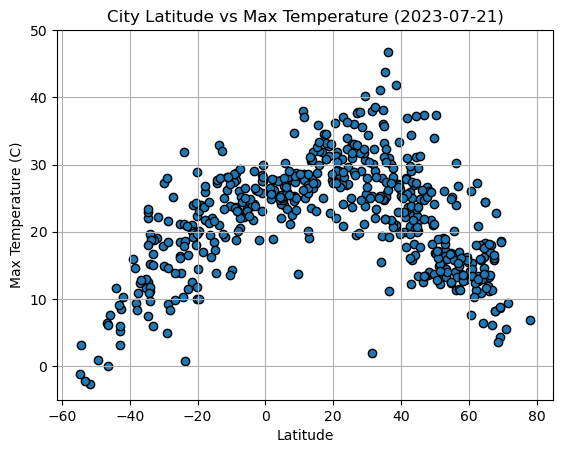

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2023-07-21)")
plt.grid(True)
plt.ylim(-5,50)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

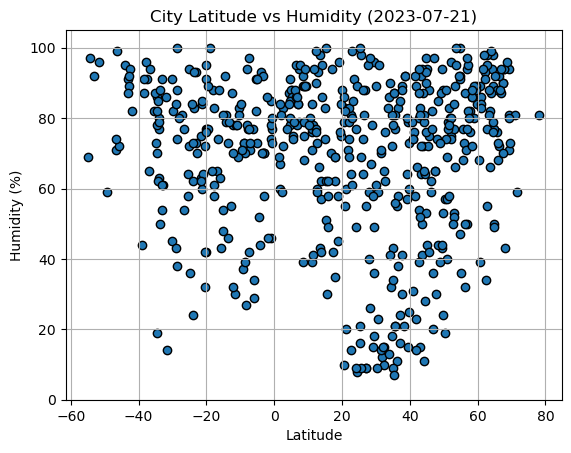

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-07-21)")
plt.grid(True)
plt.ylim(0,105)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

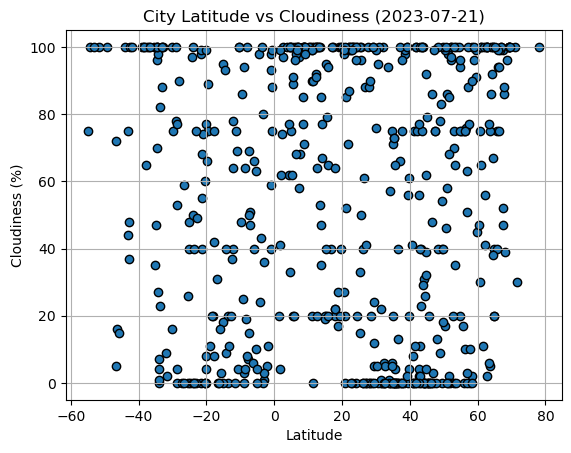

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-07-21)")
plt.grid(True)
plt.ylim(-5,105)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

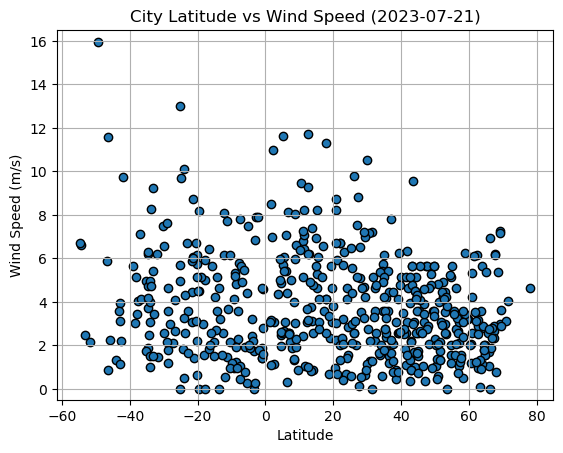

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-07-21)")
plt.grid(True)
plt.ylim(-.5,16.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
def regression_plot(df, x_col, y_col):
    
    x_values = df[x_col].values
    y_values = df[y_col].values
    
# Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
    plt.scatter(x_values,y_values)

# Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

# Label plot
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Print r square value
    print(f"the r-value: {abs(rvalue)}")
    
# Show plot
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klyuchi,52.2667,79.1667,19.02,75,96,4.90,RU,1689976354
3,seme,15.1942,-12.9448,32.27,51,95,5.27,SN,1689976355
5,hamilton,39.1834,-84.5333,27.07,57,100,4.12,US,1689976639
8,mount pearl,47.5166,-52.7813,26.19,65,75,5.66,CA,1689976356
9,kavaratti,10.5669,72.6420,28.16,80,100,9.45,IN,1689976356


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,3.18,97,100,6.62,GS,1689976355
2,codrington,-38.2667,141.9667,9.46,87,100,5.15,AU,1689976081
4,pointe aux piments,-20.0628,57.5131,22.31,77,8,5.75,MU,1689976355
6,port-aux-francais,-49.3500,70.2167,0.87,59,100,15.95,TF,1689976005
7,adamstown,-25.0660,-130.1015,21.08,72,48,13.01,PN,1689976356


###  Temperature vs. Latitude Linear Regression Plot

the r-value: 0.6161136140113644


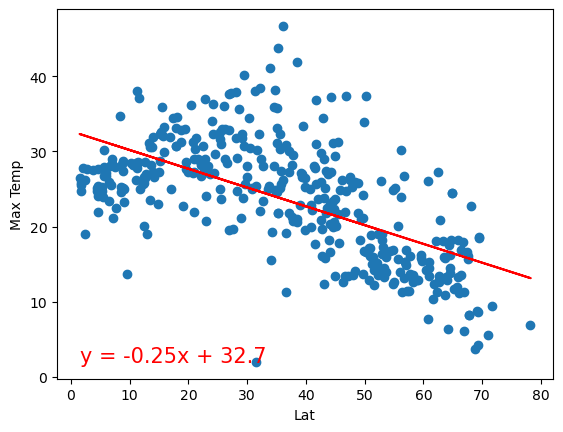

In [125]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df,"Lat","Max Temp")

the r-value: 0.7641496368811544


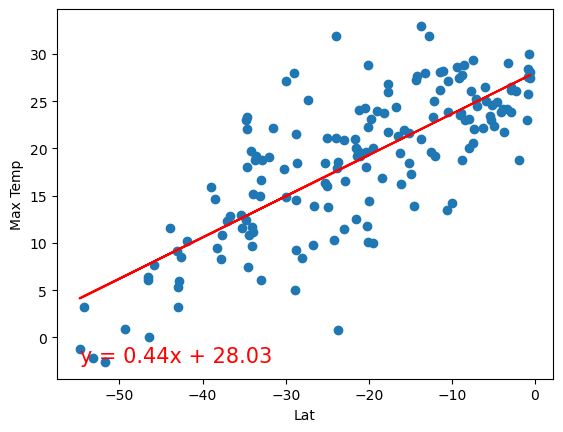

In [126]:
# Linear regression on Southern Hemisphere

regression_plot(southern_hemi_df,"Lat", "Max Temp")

**Discussion about the linear relationship:** The r value of .61 in the northern hemisphere and .76 in the southern hemisphere demostrates a fair correlation between latitude and max temperatures for the cities plotted. This suggests as the latitude moves away from zero (the equator), the lower the temperatures and vice versa.

### Humidity vs. Latitude Linear Regression Plot

the r-value: 0.06237328907181615


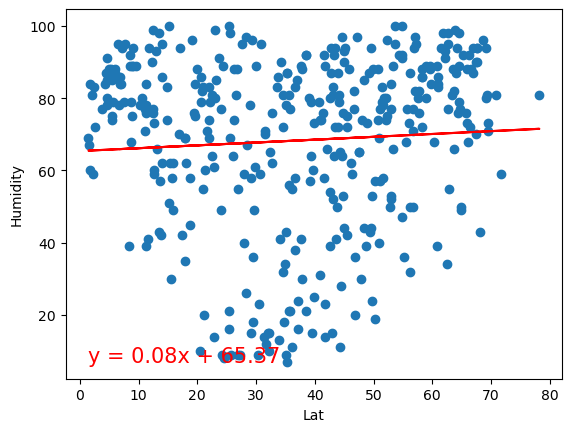

In [127]:
# Northern Hemisphere
x_values = "Lat"
y_values = "Humidity"
regression_plot(northern_hemi_df,"Lat", "Humidity")

the r-value: 0.19334562078702222


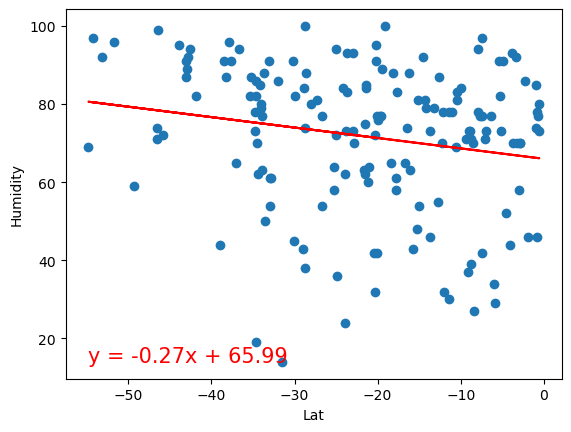

In [128]:
# Southern Hemisphere
x_values = "Lat"
y_values = "Humidity"
regression_plot(southern_hemi_df,"Lat", "Humidity")

**Discussion about the linear relationship:** An r value of .06 in the northern hemisphere and a .19 in the southern hemisphere suggests very little correlation between humidity and latitude since the closer to zero the r value is the less relationship exists between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value: 0.0756781873429606


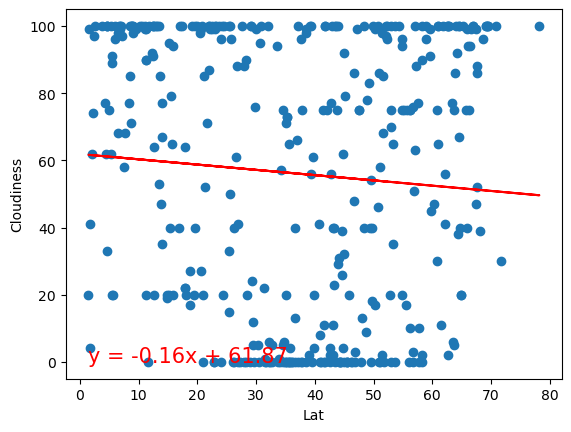

In [129]:
# Northern Hemisphere
regression_plot(northern_hemi_df,"Lat", "Cloudiness")

the r-value: 0.2500523389907093


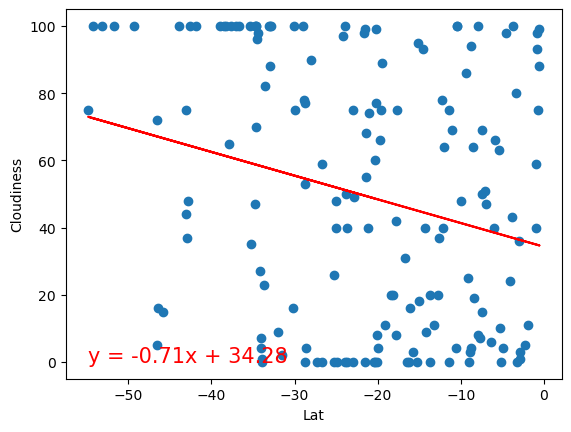

In [130]:
# Southern Hemisphere
regression_plot(southern_hemi_df,"Lat", "Cloudiness")

**Discussion about the linear relationship:** An r value of .075 in the northern hemisphere and a .25 in the southern hemisphere suggests very little correlation between cloudiness and latitude since the closer to zero the r value is the less relationship exists between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value: 0.2544575845633872


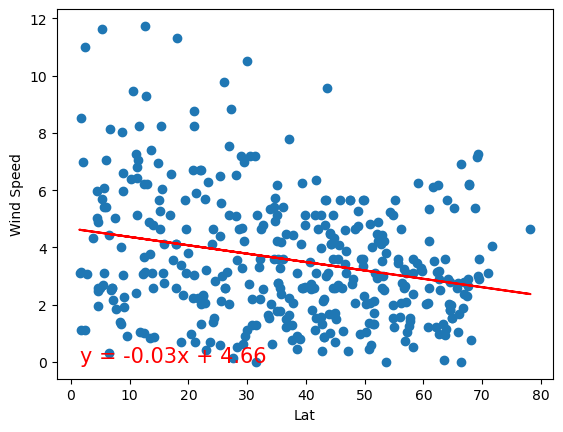

In [131]:
# Northern Hemisphere
regression_plot(northern_hemi_df,"Lat", "Wind Speed")

the r-value: 0.21222266233617912


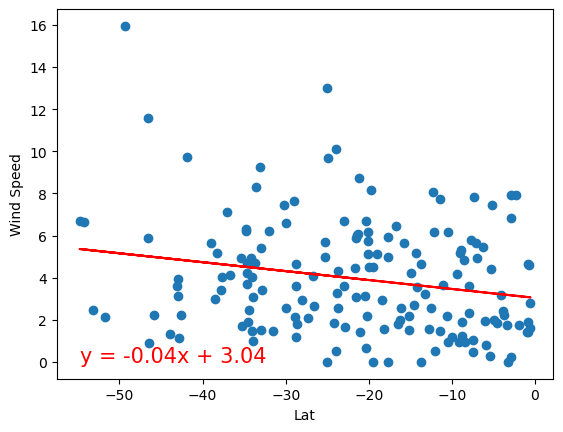

In [133]:
# Southern Hemisphere
regression_plot(southern_hemi_df,"Lat", "Wind Speed")

**Discussion about the linear relationship:** An r value of .25 in the northern hemisphere and a .21 in the southern hemisphere suggests very little correlation between wind speed and latitude since the closer to zero the r value is the less relationship exists between the two variables.